## Prerequisites

Run this cell to prepare the environment. This step is obligatory.

In [ ]:
!pip install retentioneering

The full text of [Clusters](https://doc.retentioneering.com/release3/doc/user_guides/clusters.html) user guide is available on the retentioneering website.

## Loading data

In [3]:
import numpy as np
import pandas as pd
import retentioneering
from retentioneering import datasets

stream = datasets.load_simple_shop()\
    .split_sessions(timeout=(30, 'm'))

## General usage

/Users/Daria/venv/rete_tools/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='clusters', ylabel='value'>

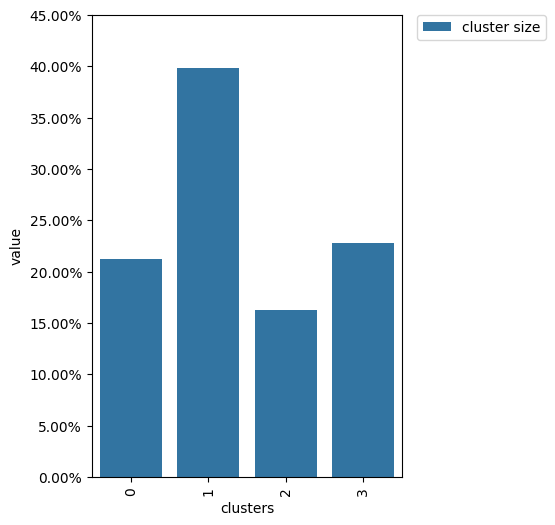

In [4]:
from retentioneering.tooling.clusters import Clusters

clusters = Clusters(eventstream=stream)
features = clusters.extract_features(feature_type='tfidf', ngram_range=(1, 1))
clusters.fit(method='kmeans', n_clusters=4, X=features)
clusters.plot()

## Extracting features


In [5]:
clusters.extract_features(ngram_range=(1, 2), feature_type='tfidf')

,cart_tfidf,cart cart_tfidf,cart catalog_tfidf,cart delivery_choice_tfidf,cart session_end_tfidf,catalog_tfidf,catalog cart_tfidf,catalog catalog_tfidf,catalog main_tfidf,catalog product1_tfidf,...,product1 session_end_tfidf,product2_tfidf,product2 cart_tfidf,product2 catalog_tfidf,product2 session_end_tfidf,session_end_tfidf,session_end session_start_tfidf,session_start_tfidf,session_start catalog_tfidf,session_start main_tfidf
user_id,,,,,,,,,,,,,,,,,,,,,
122915,0.049961,0.0,0.000000,0.000000,0.088215,0.559858,0.061152,0.292443,0.275848,0.264435,...,0.0,0.117693,0.0,0.143197,0.000000,0.059928,0.061654,0.059928,0.000000,0.097361
463458,0.000000,0.0,0.000000,0.000000,0.000000,0.647010,0.000000,0.633687,0.179318,0.000000,...,0.0,0.153015,0.0,0.186174,0.000000,0.077913,0.000000,0.077913,0.103926,0.000000
1475907,0.115977,0.0,0.000000,0.140298,0.000000,0.361011,0.000000,0.226289,0.000000,0.153463,...,0.0,0.273208,0.0,0.166207,0.269755,0.139114,0.143122,0.139114,0.000000,0.226012
1576626,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.266550,0.000000,0.266550,0.000000,0.433051
2112338,0.000000,0.0,0.000000,0.000000,0.000000,0.446640,0.000000,0.466606,0.330096,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.143426,0.000000,0.143426,0.000000,0.233017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999275109,0.210805,0.0,0.000000,0.255011,0.000000,0.262476,0.258028,0.205657,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.126430,0.000000,0.126430,0.168641,0.000000
999642905,0.169564,0.0,0.000000,0.205122,0.000000,0.211126,0.207549,0.000000,0.234054,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.101696,0.000000,0.101696,0.135648,0.000000
999914554,0.087239,0.0,0.000000,0.000000,0.154037,0.543113,0.106782,0.425544,0.361256,0.115436,...,0.0,0.000000,0.0,0.000000,0.000000,0.052322,0.000000,0.052322,0.000000,0.085004


## Fitting clusters

### Pre-defined clustering methods

In [6]:
clusters = Clusters(eventstream=stream)
features = clusters.extract_features(ngram_range=(1, 2), feature_type='tfidf')
clusters.fit(method='kmeans', n_clusters=4, X=features)

/Users/Daria/venv/rete_tools/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Custom clustering

In [7]:
user_ids = stream.to_dataframe()['user_id'].unique()
np.random.seed(42)
cluster_ids = np.random.choice([0, 1, 2, 3], size=len(user_ids))
user_clusters = pd.Series(cluster_ids, index=user_ids)
user_clusters

219483890    2
964964743    3
629881394    0
629881395    2
495985018    2
            ..
125426031    3
26773318     3
965024600    0
831491833    1
962761227    2
Length: 3751, dtype: int64

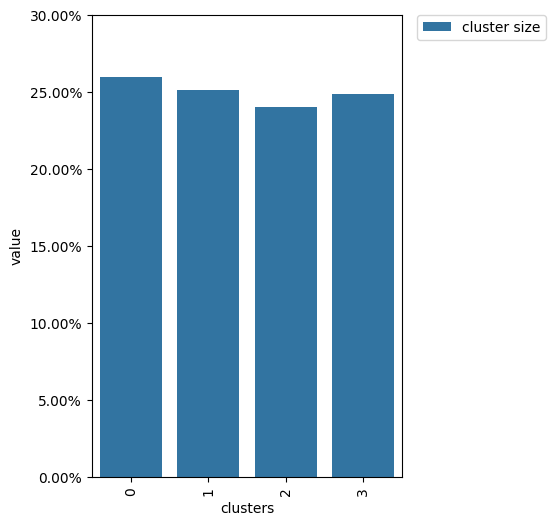

In [8]:
clusters_random = Clusters(stream)
clusters_random.set_clusters(user_clusters)
clusters_random.plot();

## Cluster analysis methods

### Visualization

#### Basic cluster statistics

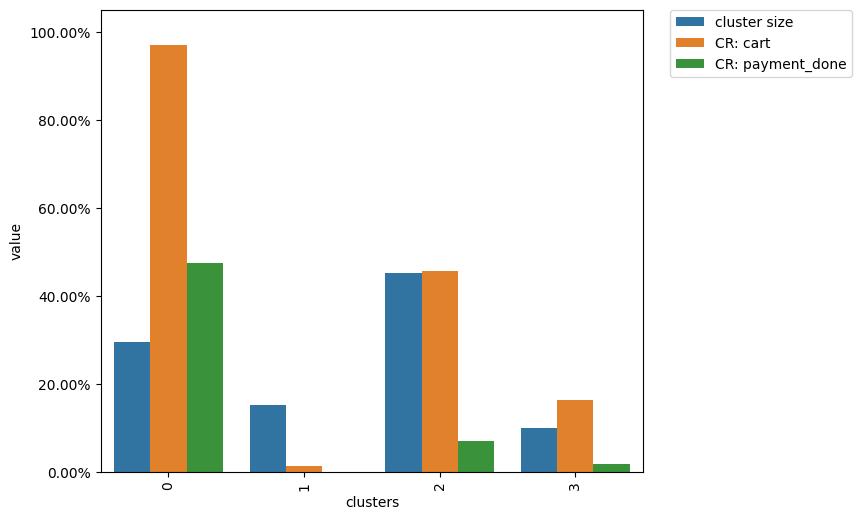

In [9]:
clusters.plot(targets=['cart', 'payment_done']);

#### Projections

<Axes: >

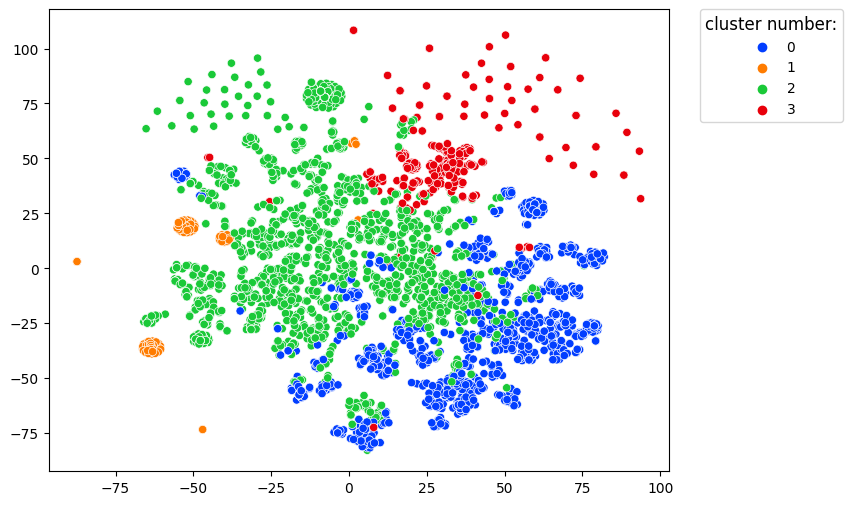

In [10]:
clusters.projection(method='tsne')

<Axes: >

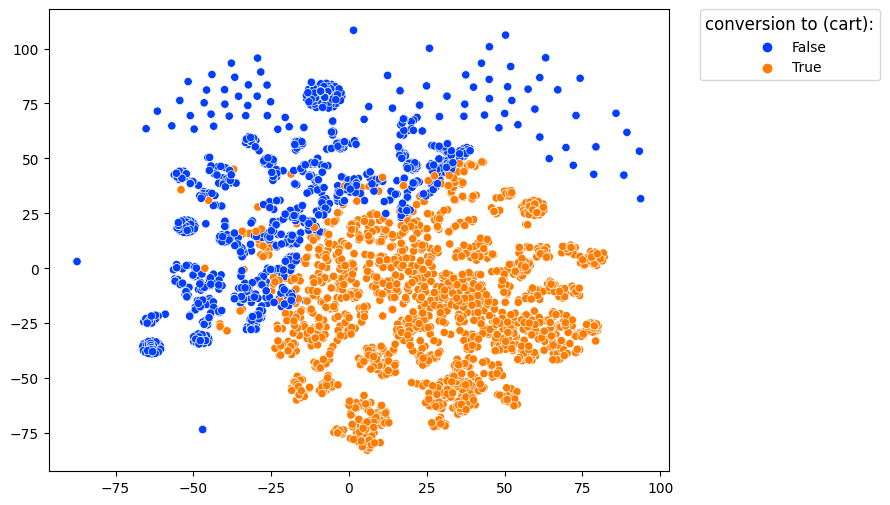

In [11]:
clusters.projection(method='tsne', color_type='targets', targets=['cart'])

### Exploring individual clusters

In [12]:
clusters\
    .filter_cluster(cluster_id=0)\
    .add_start_end_events()\
    .transition_graph(
        targets={
            'positive': 'payment_done',
            'negative': 'path_end'
        }
    );

### Cluster comparison

/Users/Daria/Dev/Retentioneering/retentioneering-tools-new-arch/retentioneering/tooling/clusters/clusters.py:226: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_all.append(top_cluster, ignore_index=True, sort=False),


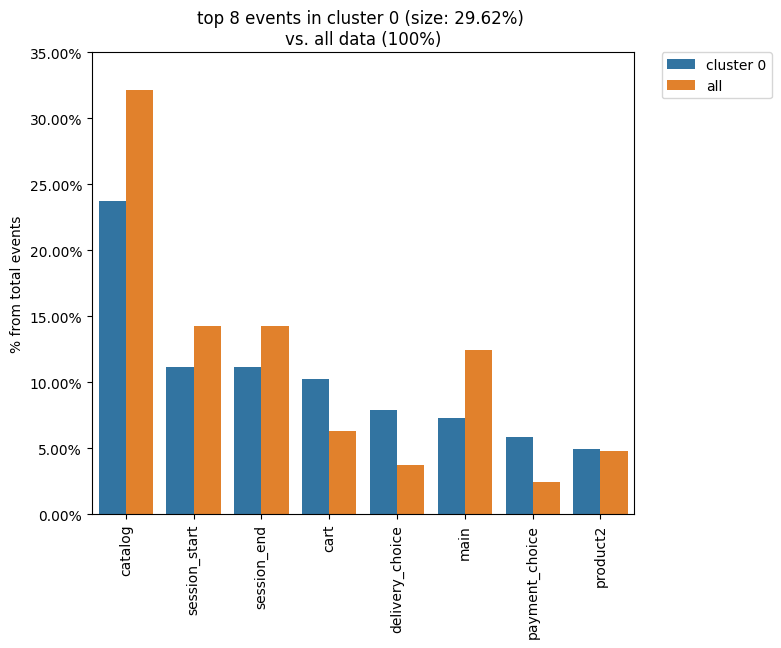

In [13]:
clusters.diff(cluster_id1=0);

/Users/Daria/Dev/Retentioneering/retentioneering-tools-new-arch/retentioneering/tooling/clusters/clusters.py:226: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_all.append(top_cluster, ignore_index=True, sort=False),


<Axes: title={'center': 'top 5 events in cluster 0 (size: 29.62%) \nvs. all data (100%)'}, ylabel="% of 'user_id' with given event">

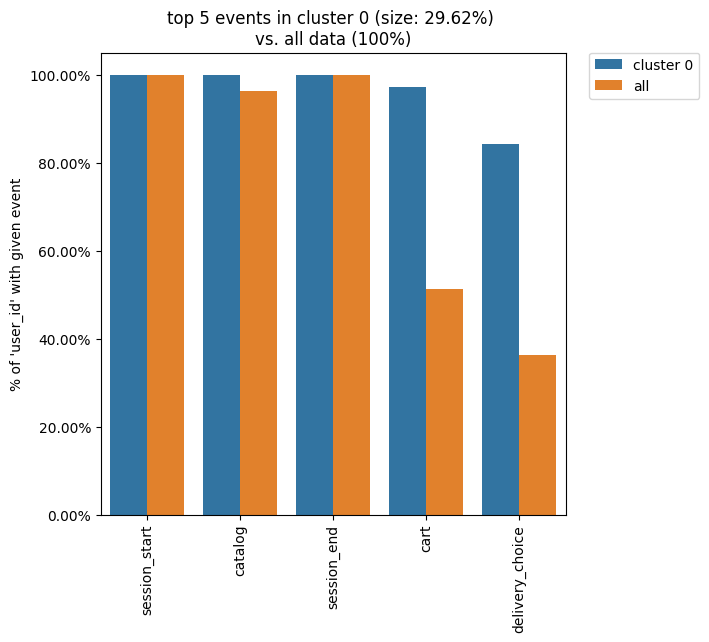

In [14]:
clusters.diff(cluster_id1=0, top_n_events=5, weight_col='user_id')

/usr/local/lib/python3.10/dist-packages/retentioneering/tooling/clusters/clusters.py:201: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_all.append(top_cluster, ignore_index=True, sort=False),


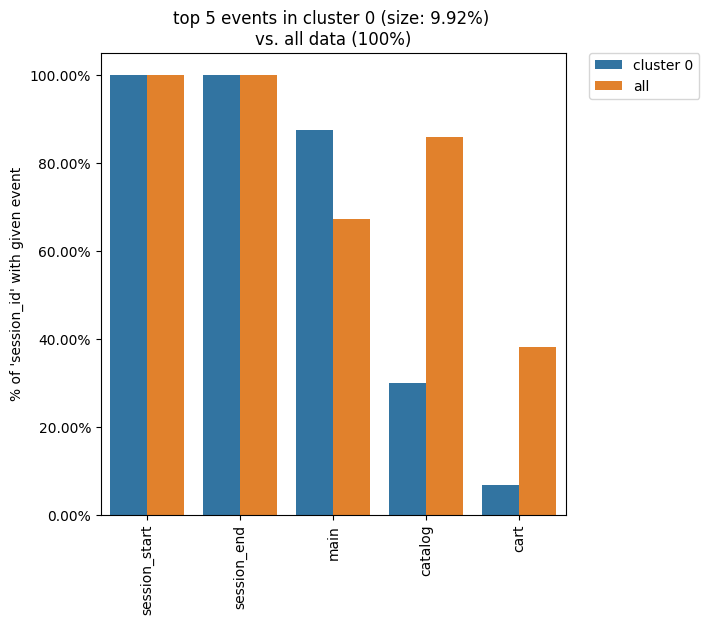

In [ ]:
clusters.diff(cluster_id1=0, top_n_events=5, weight_col='session_id');

/Users/Daria/Dev/Retentioneering/retentioneering-tools-new-arch/retentioneering/tooling/clusters/clusters.py:226: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_all.append(top_cluster, ignore_index=True, sort=False),


<Axes: title={'center': 'top 5 events in cluster 0 (size: 29.62%) \nvs. cluster 1 (size: 15.14%)'}, ylabel='% from total events'>

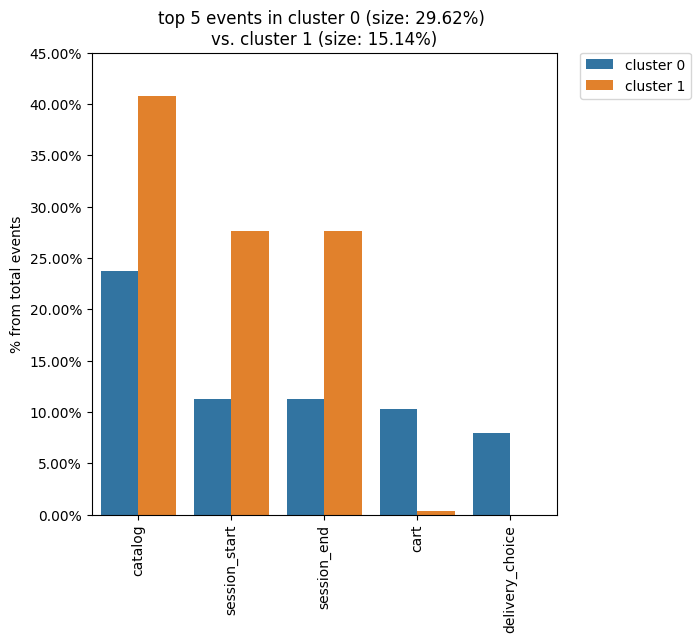

In [15]:
clusters.diff(cluster_id1=0, cluster_id2=1, top_n_events=5)

## Getting clustering results

In [16]:
clusters.user_clusters

user_id
122915       2
463458       2
1475907      2
1576626      3
2112338      2
            ..
999275109    0
999642905    0
999914554    2
999916163    0
999941967    1
Length: 3751, dtype: int32

In [17]:
cluster_mapping = clusters.cluster_mapping
list(cluster_mapping.keys())

[0, 1, 2, 3]

In [18]:
cluster_mapping[0][:10]

[2724645,
 4608042,
 5918715,
 6985523,
 7584012,
 7901023,
 8646372,
 8715027,
 8788425,
 10847418]

### Eventstream.clusters property

/Users/Daria/venv/rete_tools/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


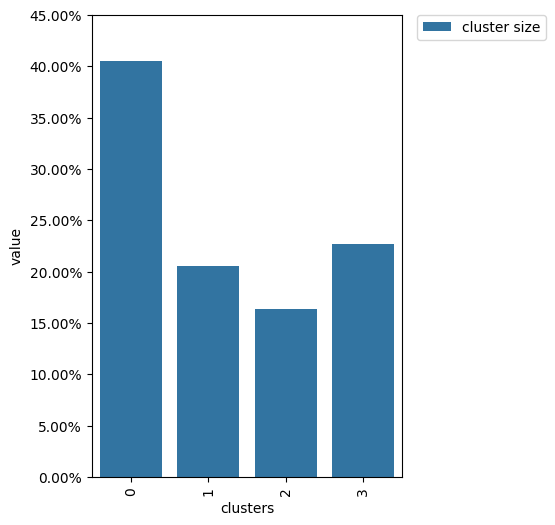

In [19]:
clusters = stream.clusters
features = clusters.extract_features(feature_type='tfidf', ngram_range=(1, 1))
clusters.fit(method='kmeans', n_clusters=4, X=features)
clusters.plot();